In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import re

In [2]:
#Loading the data
df = pd.read_csv("../data/uber-eats-deliveries.csv")
df.head(10)

/var/folders/m4/y98c53d15dg1mt8b2xxsb6s40000gn/T/ipykernel_5252/2573212652.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/uber-eats-deliveries.csv")


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x463,VADRES20DEL03,NaN,NaN,-22.311358,-73.164798,22.371358,73.224798,3/4/22,NaN,23:30:00,conditions NaN,NaN,3,Buffet,electric_scooter,1,No,Metropolitian,(min) 21
1,0x139b,VADRES20DEL03,NaN,NaN,22.311358,73.164798,22.341358,73.194798,3/3/22,NaN,18:05:00,conditions Sandstorms,Medium,2,Drinks,electric_scooter,1,No,Urban,(min) 24
2,0x72b,VADRES20DEL03,NaN,NaN,22.311358,73.164798,22.401358,73.254798,25-03-2022,NaN,21:00:00,conditions Fog,Jam,0,Meal,motorcycle,2,No,Metropolitian,(min) 43
3,0x138c,VADRES20DEL02,NaN,NaN,22.311358,73.164798,22.441358,73.294798,31-03-2022,NaN,19:55:00,conditions Stormy,Jam,2,Buffet,motorcycle,0,No,Urban,(min) 24
4,0x950,VADRES20DEL01,NaN,NaN,22.311358,73.164798,22.351358,73.204798,3/3/22,NaN,15:50:00,conditions Fog,Medium,1,Snack,motorcycle,1,No,NaN,(min) 19
5,0xd55,VADRES20DEL01,NaN,NaN,22.311358,73.164798,22.351358,73.204798,13-03-2022,NaN,13:45:00,conditions Fog,High,1,Snack,motorcycle,1,No,Metropolitian,(min) 20
6,0xaa3,VADRES20DEL01,NaN,NaN,22.311358,73.164798,22.351358,73.204798,11/3/22,NaN,13:40:00,conditions Sandstorms,High,0,Buffet,motorcycle,0,No,Metropolitian,(min) 38
7,0x4d2,VADRES19DEL03,NaN,NaN,-22.311844,-73.165081,22.401844,73.255081,6/3/22,NaN,18:55:00,conditions NaN,NaN,3,Buffet,bicycle,1,No,Metropolitian,(min) 26
8,0x32b7,VADRES19DEL03,NaN,NaN,22.311844,73.165081,22.341844,73.195081,1/4/22,NaN,20:20:00,conditions Sandstorms,Jam,1,Snack,motorcycle,1,No,Metropolitian,(min) 29
9,0x52d,VADRES19DEL03,NaN,NaN,22.311844,73.165081,22.371844,73.225081,1/3/22,NaN,22:45:00,conditions Cloudy,Low,2,Meal,scooter,0,No,Urban,(min) 18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

## Notes
1. Check for missing(Null) values. are there any highest orders from a single customer
2. Check for zero values
3. Check for duplicate rows not for duplicate id's or duplicate_person_id as a 
   customer can make multiple orders and delivery partner(DP) can do multiple deliveries
4. Check Outliers in Delivery person age and see the data distribution of DP age 
    and make plots against DP age VS the time taken to deliver
5. Check for 0 ratings(This can happen when a new DP joined) and outlier ratings. 
    Make plots for ratings and the Time_taken(min)
    make plots for ratings and the distance travelled(write a c=function to calculate distance)
6. For Restaurant_latitude, Restaurant_longitude, Delivery_location_latitude, Delivery_location_longitude
    write to function to check whether the latitude and logitude are valid and both the latitude and longitude are pointing to a vlaid location. 
    Write a function to calcuate the distance between restaurant location and delivery location
7. Check for missing and outliers in Date.
    Plot for dates and the time_taken. See any patterns for the seasonality/trend 
9. Check for missing and outliers in time ordered.
    Plot for no.of orders placed during that time and the time_taken. See any patterns for the seasonality/trend. Check when are the highest number of orders placed. 
10. Time order picked. Write a function to calculate the time diff b/w the order placed and picked.
    See the relation b/e the time diff and the Time_taken(min)
11. How weather conditions are effecting the time_taken(min) using plots
12. Road_traffic_density is one of the key feature. Plotting this can reveal interesting points such as
    to avoid any routes or placing a surge during that particular time when the road traffic density is high.
13. Vehicle-condition has to be good. Plot the consditon Vs Time_taken. Incentivize the DP for vehicles to 
    improve the time_taken
14. type_of_order plays a crucial role as some items requires more time to prepare the food
15. Type-of_vehicle also has an impact as some low power vehicles take more time
16. If a DP is doing multiple deliveries then there might be a chance of some deliveries getting delayed
17. Festival times can be tricky, because during some festivals the roads will be empty and for some
    festivals roads will be full. For some festivals customers prefer ordering food. For some festivasl customers prefer making food in home itself.
18. City : If it is urban, Semi-Urban, Metropolitan




In [4]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')

## Convert string formatted numeric data to numeric columns


In [5]:
def convert_string_to_numeric(x):
    if x is None or x == "":
        return pd.NA
    try:
        return float(x)
    except ValueError :
        return pd.NA

numeric_columns = ['Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Vehicle_condition', 
       'multiple_deliveries', 'Time_taken(min)']

for col in numeric_columns:
    if col == "Time_taken(min)":
        df[col] = df[col].apply(lambda x : convert_string_to_numeric(re.search(r'\d+', x).group()))
    else:
        print(col)
        df[col] = df[col].apply(lambda x : convert_string_to_numeric(x))

Delivery_person_Age
Delivery_person_Ratings
Restaurant_latitude
Restaurant_longitude
Delivery_location_latitude
Delivery_location_longitude
Vehicle_condition
multiple_deliveries


In [6]:
df.iloc[3456]

ID                                       0xd7d3 
Delivery_person_ID                DEHRES12DEL02 
Delivery_person_Age                         39.0
Delivery_person_Ratings                      4.1
Restaurant_latitude                          0.0
Restaurant_longitude                         0.0
Delivery_location_latitude                  0.13
Delivery_location_longitude                 0.13
Order_Date                            14-02-2022
Time_Orderd                             21:35:00
Time_Order_picked                       21:40:00
Weatherconditions              conditions Cloudy
Road_traffic_density                        Jam 
Vehicle_condition                            1.0
Type_of_order                            Drinks 
Type_of_vehicle                      motorcycle 
multiple_deliveries                          2.0
Festival                                     No 
City                              Metropolitian 
Time_taken(min)                             39.0
Name: 3456, dtype: o

In [7]:
def check_null_values_and_format(df, col_name):
    print(f"The column {col_name} is of data type {df[col_name].dtype}")
    if df[col_name].isnull().sum() == 0:
        return print("No Null values are there")
    else :
        return print("Null values")

In [8]:
check_null_values_and_format(df, "ID")
check_null_values_and_format(df, "Delivery_person_ID")

The column ID is of data type object
No Null values are there
The column Delivery_person_ID is of data type object
No Null values are there


# Data Preprocessing

In [9]:
#Remove records with no ID
def remove_records_with_no_ID(df, col_name):
    df = df.dropna(subset = [col_name])
    return df

### next improvement is to come with a strategy to handle orders with no order ID

In [10]:
print(df.shape)
df = remove_records_with_no_ID(df, "ID")
print(df.shape)

(45593, 20)
(45593, 20)


# A look through data

In [11]:
df["Delivery_person_Age"].unique()

array([nan, 50., 39., 38., 37., 36., 35., 34., 33., 32., 31., 30., 29.,
       28., 27., 26., 25., 24., 23., 22., 21., 20., 15.])

In [12]:
df["Delivery_person_Ratings"].unique()

array([nan, 6. , 4.1, 4.2, 5. , 4.6, 4.3, 4.4, 4.7, 4.9, 4.8, 4. , 3.6,
       3.5, 3.9, 4.5, 3.7, 3.8, 3.4, 3. , 3.1, 3.2, 3.3, 2.7, 2.6, 2.5,
       2.9, 2.8, 1. ])

In [13]:
df["Order_Date"].unique(), df["Time_Orderd"].unique()

(array(['3/4/22', '3/3/22', '25-03-2022', '31-03-2022', '13-03-2022',
        '11/3/22', '6/3/22', '1/4/22', '1/3/22', '2/3/22', '20-03-2022',
        '21-03-2022', '10/3/22', '28-03-2022', '5/4/22', '7/3/22',
        '14-03-2022', '6/4/22', '29-03-2022', '16-03-2022', '4/3/22',
        '8/3/22', '18-03-2022', '19-03-2022', '4/4/22', '17-03-2022',
        '24-03-2022', '2/4/22', '5/3/22', '23-03-2022', '15-03-2022',
        '27-03-2022', '26-03-2022', '9/3/22', '30-03-2022', '12/3/22',
        '17-02-2022', '13-02-2022', '14-02-2022', '11/2/22', '15-02-2022',
        '18-02-2022', '16-02-2022', '12/2/22'], dtype=object),
 array(['NaN ', '19:55:00', '20:10:00', '9:40:00', '18:40:00', '19:35:00',
        '20:15:00', '19:00:00', '20:45:00', '23:15:00', '9:30:00',
        '21:45:00', '8:20:00', '11:35:00', '17:10:00', '14:30:00',
        '12:50:00', '10:10:00', '10:15:00', '17:40:00', '21:00:00',
        '20:50:00', '11:10:00', '16:50:00', '14:20:00', '17:20:00',
        '13:30:00', '21:15

In [14]:
df["Time_Order_picked"].unique()

array(['23:30:00', '18:05:00', '21:00:00', '19:55:00', '15:50:00',
       '13:45:00', '13:40:00', '18:55:00', '20:20:00', '22:45:00',
       '19:25:00', '8:50:00', '20:00:00', '20:25:00', '17:55:00',
       '9:55:00', '19:30:00', '9:30:00', '9:20:00', '9:00:00', '22:00:00',
       '13:30:00', '0:05:00', '22:30:00', '11:10:00', '9:45:00',
       '19:45:00', '21:05:00', '17:30:00', '20:35:00', '9:35:00',
       '12:00:00', '21:50:00', '21:10:00', '13:00:00', '23:00:00',
       '11:30:00', '19:40:00', '18:50:00', '10:15:00', '20:30:00',
       '17:35:00', '19:15:00', '0:10:00', '22:40:00', '9:05:00',
       '20:45:00', '22:55:00', '23:20:00', '10:05:00', '16:40:00',
       '22:50:00', '14:25:00', '23:40:00', '9:25:00', '11:35:00',
       '20:55:00', '19:00:00', '22:15:00', '18:30:00', '8:45:00',
       '22:05:00', '9:40:00', '19:50:00', '21:45:00', '22:20:00',
       '13:35:00', '10:50:00', '17:50:00', '18:25:00', '10:35:00',
       '13:05:00', '8:40:00', '18:35:00', '23:05:00', '21:35:00

## There is a Not a number(NaN) values  but this present as a string -> 'NaN ' with a tab space
### In general these kind of values pass through the pd.isna() pr pd.isnull() condition
### TTreat these values as special and write the functions
### Replace this 'NaN ' as pd.NA

In [15]:
### Replace 'NaN ' as pd.NA
def replace_string_na_with_NA(df):
    return df.replace('NaN ' , pd.NA)

df = replace_string_na_with_NA(df)

## Filling missing or null latitde and logitude values

In [16]:
#Check latitude
def is_latitude(value):
    return -90<=value<=90

#Check longitude
def is_longitude(value):
    return -180<=value<=180

### Replace 0 or other non latitude and longitude values
def replace_non_lat_lang_with_NA(df, geography_col):
    if geography_col.endswith("latitude"):
        df[geography_col] = df[geography_col].apply(lambda x : pd.NA if x is not None 
                                                    and not is_latitude(x) else x)
    elif geography_col.endswith("longitude"):
        df[geography_col] = df[geography_col].apply(lambda x : pd.NA if x is not None 
                                                    and not is_longitude(x) else x)
    else:
        pass
    return df


geogrpahy_columns = []
for col_name in df.columns:
    if col_name.endswith("latitude") or col_name.endswith("longitude"):
        geogrpahy_columns.append(col_name)

for col in geogrpahy_columns:
    replace_non_lat_lang_with_NA(df, col)

In [17]:
df["Order_Date"].unique()
# No Nan or missing values

array(['3/4/22', '3/3/22', '25-03-2022', '31-03-2022', '13-03-2022',
       '11/3/22', '6/3/22', '1/4/22', '1/3/22', '2/3/22', '20-03-2022',
       '21-03-2022', '10/3/22', '28-03-2022', '5/4/22', '7/3/22',
       '14-03-2022', '6/4/22', '29-03-2022', '16-03-2022', '4/3/22',
       '8/3/22', '18-03-2022', '19-03-2022', '4/4/22', '17-03-2022',
       '24-03-2022', '2/4/22', '5/3/22', '23-03-2022', '15-03-2022',
       '27-03-2022', '26-03-2022', '9/3/22', '30-03-2022', '12/3/22',
       '17-02-2022', '13-02-2022', '14-02-2022', '11/2/22', '15-02-2022',
       '18-02-2022', '16-02-2022', '12/2/22'], dtype=object)

In [18]:
## Converting all date formats into a single format
def convert_into_ddmmyyyy_format(df, date_column):
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce', dayfirst= True)
    df["date_column_ddmmyyy"] = df[date_column].dt.strftime('%d%m%Y')
    return df

df = convert_into_ddmmyyyy_format(df, "Order_Date")

/var/folders/m4/y98c53d15dg1mt8b2xxsb6s40000gn/T/ipykernel_5252/212370152.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_column] = pd.to_datetime(df[date_column], errors='coerce', dayfirst= True)


In [19]:
df["Time_Orderd"].isna().sum()
# We have a total 1731 missing values of Time ordered
# Remove rows where Time Ordered is missing 

np.int64(1731)

In [20]:
df["Time_Order_picked"].isna().sum()
# We have a total 0 missing values of Time ordered


np.int64(0)

In [21]:
df["Weatherconditions"].unique()
#preplacing missing NaN with pd.NA
df["Weatherconditions"] = df["Weatherconditions"].replace('conditions NaN', pd.NA)
## We can fill missing values by taking a guess at the date and put a season for particualr months

In [22]:
df["Road_traffic_density"].unique()
df["Road_traffic_density"].value_counts()
## Jam means more than high traffice density
# Low traffic density is vehicles are moving fast
## If we can draw a relation between time of the day and road traffic density 
## then we can fill Road_traffic_density missing values
df["Road_traffic_density"] = df["Road_traffic_density"].replace('conditions NaN', pd.NA)

In [23]:
df["Vehicle_condition"].unique()
#No missing values

array([3., 2., 0., 1.])

In [24]:
df["Type_of_order"].unique()
#No missing values

array(['Buffet ', 'Drinks ', 'Meal ', 'Snack '], dtype=object)

In [25]:
df["Type_of_vehicle"].unique()
#No missing values

array(['electric_scooter ', 'motorcycle ', 'bicycle ', 'scooter '],
      dtype=object)

In [26]:
df["multiple_deliveries"].unique()
#No missing values
#Replace with median 

array([ 1.,  2.,  0.,  3., nan])

In [27]:
df["Festival"].unique()

array(['No ', 'Yes ', <NA>], dtype=object)

In [28]:
df["City"].unique()

array(['Metropolitian ', 'Urban ', <NA>, 'Semi-Urban '], dtype=object)

In [29]:
df["Time_taken(min)"].isnull().sum()

np.int64(0)

In [30]:
## Calculating % of missing values in each column
missing_values_df = pd.DataFrame(columns=["Column", "MissingPercentage"])
for index, col_name in enumerate(df.columns):
    num_missing_values = df[col_name].isnull().sum()
    missing_values_df = pd.concat([missing_values_df, 
                                  pd.DataFrame({"Column": col_name , 
                                                "MissingPercentage" :[num_missing_values/df.shape[0]*100]})])

missing_values_df.reset_index(drop=True, inplace=True)
missing_values_df

/var/folders/m4/y98c53d15dg1mt8b2xxsb6s40000gn/T/ipykernel_5252/2940592197.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  missing_values_df = pd.concat([missing_values_df,


,Column,MissingPercentage
0,ID,0.000000
1,Delivery_person_ID,0.000000
2,Delivery_person_Age,4.066414
3,Delivery_person_Ratings,4.184853
4,Restaurant_latitude,0.000000
5,Restaurant_longitude,0.000000
6,Delivery_location_latitude,0.000000
7,Delivery_location_longitude,0.000000
8,Order_Date,0.000000
9,Time_Orderd,3.796635


# Filling missing values
### 1. Delivery_person_Age
### 2. Delivery_person_Ratings
### 3. Time_Orderd
### 4. Weatherconditions
### 5. Road_traffic_density
### 6. Multiple_deliveries
### 7. Festival
### 8. City


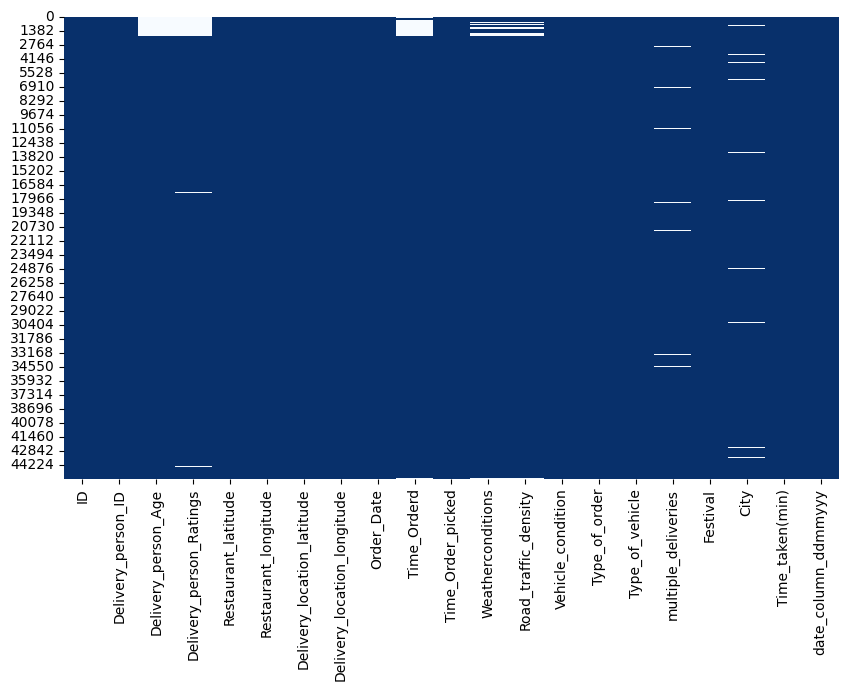

In [31]:
plt.figure(figsize = (10, 6))

sns.heatmap(df.isna(), cmap = 'Blues_r', cbar = False);

/var/folders/m4/y98c53d15dg1mt8b2xxsb6s40000gn/T/ipykernel_5252/2965447373.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df[df.TotalNaN != 0], x = 'TotalNaN', palette = 'viridis', edgecolor = 'k')


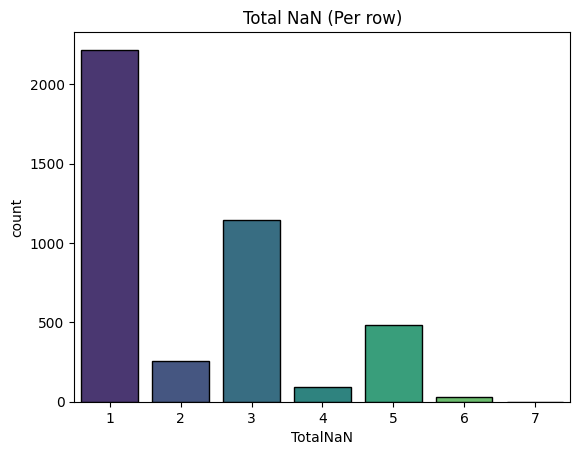

In [32]:
df['TotalNaN'] = df.isna().sum(axis = 1)
sns.countplot(data = df[df.TotalNaN != 0], x = 'TotalNaN', palette = 'viridis', edgecolor = 'k')

plt.title('Total NaN (Per row)')
plt.grid(False);

In [33]:
# Rows with more than 3 NaN values

df[df['TotalNaN'] >= 5].isna().sum().sort_values(ascending = False)

Delivery_person_Age            514
Delivery_person_Ratings        514
Time_Orderd                    514
Weatherconditions              512
Road_traffic_density           510
City                            20
multiple_deliveries             14
Festival                         5
Vehicle_condition                0
date_column_ddmmyyy              0
Time_taken(min)                  0
Type_of_vehicle                  0
Type_of_order                    0
ID                               0
Delivery_person_ID               0
Time_Order_picked                0
Order_Date                       0
Delivery_location_longitude      0
Delivery_location_latitude       0
Restaurant_longitude             0
Restaurant_latitude              0
TotalNaN                         0
dtype: int64

In [34]:
# Number of Observations dropped

df.shape[0] - df[df['TotalNaN'] < 5].shape[0]

514

In [35]:
df = df[df['TotalNaN'] < 5]


In [36]:
MissingValues = pd.DataFrame(df.isna().sum().sort_values(ascending = False)[:5])

MissingValues.rename(columns = {0 : 'Missing'}, inplace = True, errors = 'raise')

MissingValues['Missing %'] = round(MissingValues['Missing'] / df.shape[0] * 100, 2)

MissingValues

,Missing,Missing %
Delivery_person_Ratings,1394,3.09
Delivery_person_Age,1340,2.97
Time_Orderd,1217,2.70
City,1180,2.62
multiple_deliveries,979,2.17
